In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score

In [5]:
df = pd.read_csv('../Dataset/RelianceClean.csv')
df.drop(['Time'], axis=1, inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume,Prev Close,Prev Open,PrevOPDiff,Prev High,Prev Low,Prev Volume
0,2014-01-03,431.71,432.57,423.49,428.07,2933613,433.39,439.68,6.29,443.79,430.96,1376901.0
1,2014-01-06,427.00,427.57,421.01,423.46,3043781,428.07,431.71,3.64,432.57,423.49,2933613.0
2,2014-01-07,423.29,425.94,416.08,417.10,3957111,423.46,427.00,3.54,427.57,421.01,3043781.0
3,2014-01-08,418.24,424.65,418.24,420.54,2909048,417.10,423.29,6.19,425.94,416.08,3957111.0
4,2014-01-09,421.23,422.89,418.56,421.36,1899340,420.54,418.24,-2.30,424.65,418.24,2909048.0


In [45]:
X=df[['Volume','Open']]
y=df['Close']
length=100

In [20]:
training_set = X.iloc[:1885].values
test_set = X.iloc[1885:].values

In [46]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled=sc.transform(test_set)

In [47]:
X_train = []
y_train = []
for i in range(length, len(training_set)):
    X_train.append(training_set_scaled[i-length:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test = []
y_test = []
for i in range(length, len(test_set)):
    X_test.append(test_set_scaled[i-length:i, 0])
    y_test.append(test_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set


In [49]:
model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs = 100, batch_size = 32)

Epoch 1/100
56/56 [==============================] - 15s 168ms/step - loss: 0.0193 - val_loss: 0.0245
Epoch 2/100
56/56 [==============================] - 8s 149ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 3/100
56/56 [==============================] - 8s 146ms/step - loss: 0.0041 - val_loss: 0.0115
Epoch 4/100
56/56 [==============================] - 8s 149ms/step - loss: 0.0039 - val_loss: 0.0075
Epoch 5/100
56/56 [==============================] - 9s 155ms/step - loss: 0.0037 - val_loss: 0.0088
Epoch 6/100
56/56 [==============================] - 9s 153ms/step - loss: 0.0029 - val_loss: 0.0060
Epoch 7/100
56/56 [==============================] - 9s 155ms/step - loss: 0.0027 - val_loss: 0.0093
Epoch 8/100
56/56 [==============================] - 9s 154ms/step - loss: 0.0028 - val_loss: 0.0066
Epoch 9/100
56/56 [==============================] - 9s 159ms/step - loss: 0.0028 - val_loss: 0.0054
Epoch 10/100
56/56 [==============================] - 8s 149ms/step - loss: 0.0027 - val_l

In [50]:
pred=model.predict(X_test)
test=pd.DataFrame(columns=['test','pred'])
test['test']=y_test
test['pred']=pred.flatten()
test

12/12 [==============================] - 2s 51ms/step


,test,pred
0,1.025255,1.006465
1,1.007027,0.997279
2,1.005860,0.988797
3,1.032178,0.983470
4,1.028081,0.986149
...,...,...
358,1.228255,1.055956
359,1.229836,1.064959
360,1.217001,1.068912
361,1.215808,1.067965


Text(500, 1.25, 'Mean Absolute error : 0.01')

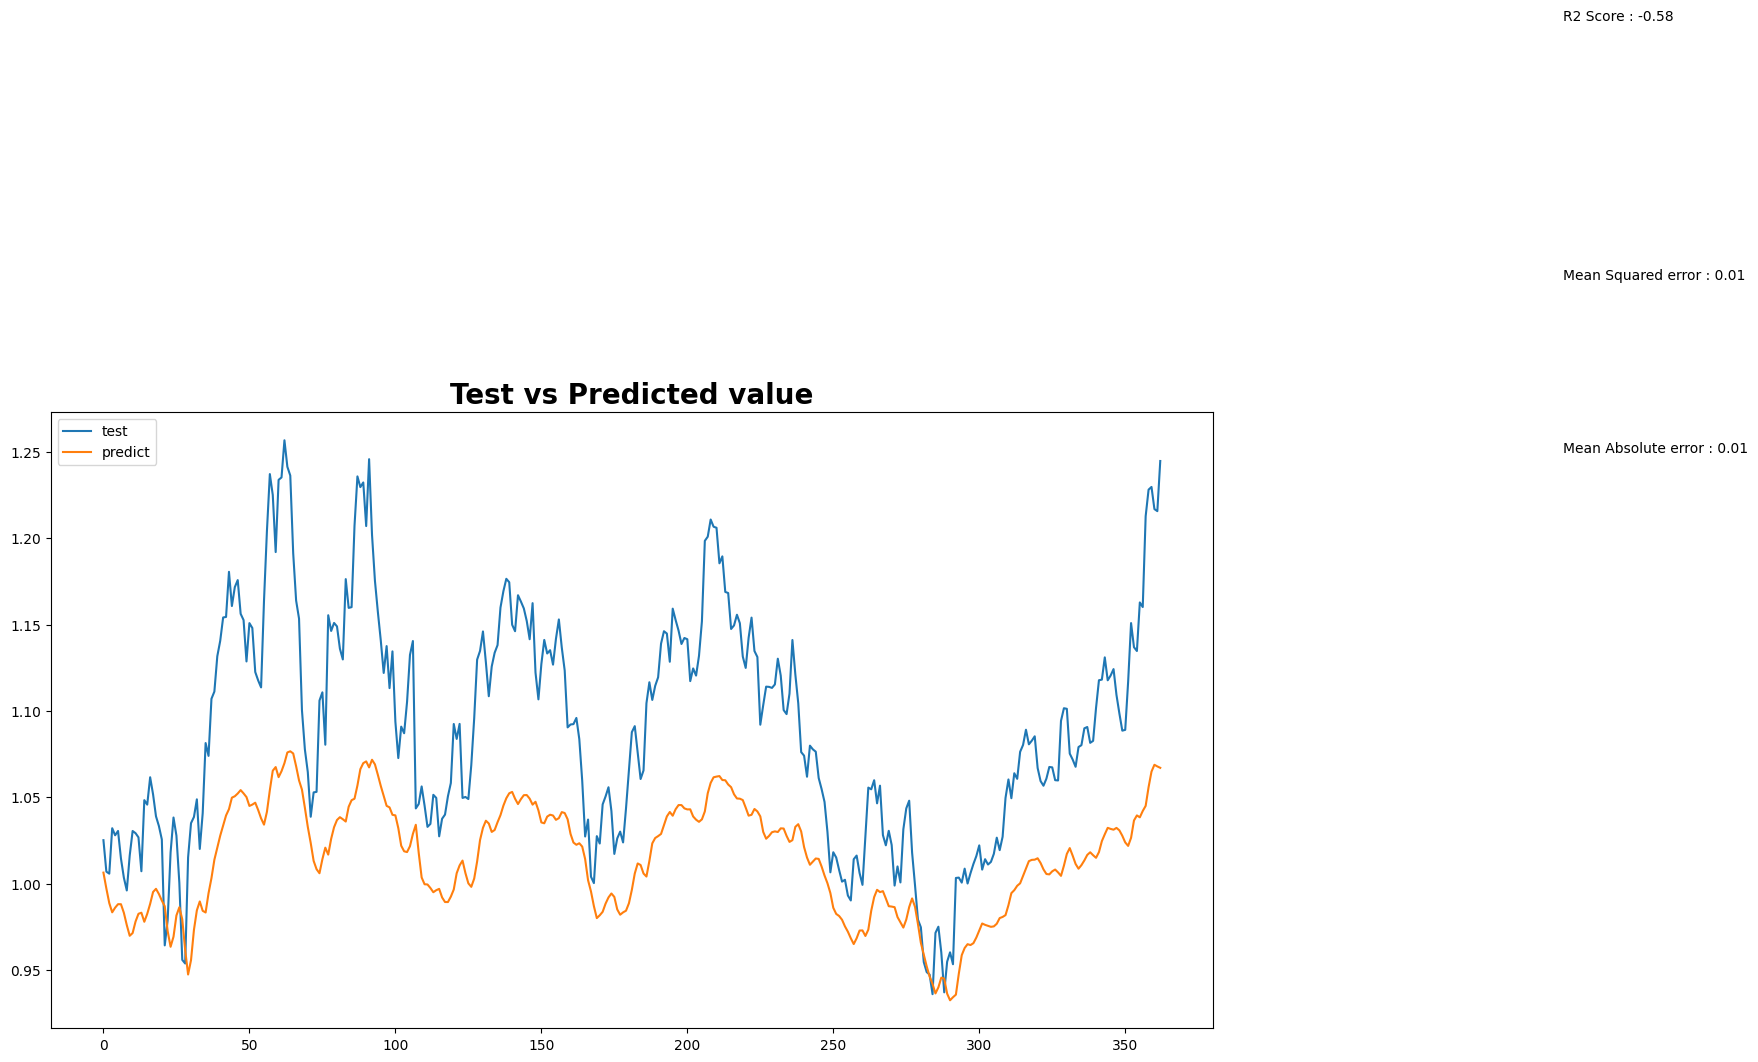

In [51]:
fig=plt.figure(figsize=(15,8))
plt.title("Test vs Predicted value", size=20, weight='bold')
plt.plot(test)
plt.legend(['test','predict'])
r2=np.round(r2_score(y_test,pred),2)
mse=np.round(mean_squared_error(y_test,pred),2)
mae=np.round(mean_squared_error(y_test,pred),2)
plt.text(x=500, y=1.5,s='R2 Score : {}'.format(r2))
plt.text(x=500, y=1.35,s='Mean Squared error : {}'.format(mse))
plt.text(x=500, y=1.25,s='Mean Absolute error : {}'.format(mae))
